Importing libraries and dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\satvi\Downloads\ev_charging_patterns.csv')

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

Data Preprocessing


In [2]:

data['Charging Start Time'] = pd.to_datetime(data['Charging Start Time'])
data['Charging End Time'] = pd.to_datetime(data['Charging End Time'])

data['Energy Consumed (kWh)'] = data['Energy Consumed (kWh)'].fillna(
    data['Charging Rate (kW)'] * data['Charging Duration (hours)']
)

data.dropna(subset=['Energy Consumed (kWh)', 'Charging Rate (kW)', 'Distance Driven (since last charge) (km)'], inplace=True)

data['Charging Start Hour'] = data['Charging Start Time'].dt.hour

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = [
    "Energy Consumed (kWh)",
    "Charging Duration (hours)",
    "Charging Rate (kW)",
    "State of Charge (Start %)",
    "State of Charge (End %)",
    "Distance Driven (since last charge) (km)"
]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1189 entries, 0 to 1319
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   User ID                                   1189 non-null   object        
 1   Vehicle Model                             1189 non-null   object        
 2   Battery Capacity (kWh)                    1189 non-null   float64       
 3   Charging Station ID                       1189 non-null   object        
 4   Charging Station Location                 1189 non-null   object        
 5   Charging Start Time                       1189 non-null   datetime64[ns]
 6   Charging End Time                         1189 non-null   datetime64[ns]
 7   Energy Consumed (kWh)                     1189 non-null   float64       
 8   Charging Duration (hours)                 1189 non-null   float64       
 9   Charging Rate (kW)                 

(  User ID Vehicle Model  Battery Capacity (kWh) Charging Station ID  \
 0  User_1        BMW i3              108.463007         Station_391   
 1  User_2  Hyundai Kona              100.000000         Station_428   
 2  User_3    Chevy Bolt               75.000000         Station_181   
 3  User_4  Hyundai Kona               50.000000         Station_327   
 4  User_5  Hyundai Kona               50.000000         Station_108   
 
   Charging Station Location Charging Start Time   Charging End Time  \
 0                   Houston 2024-01-01 00:00:00 2024-01-01 00:39:00   
 1             San Francisco 2024-01-01 01:00:00 2024-01-01 03:01:00   
 2             San Francisco 2024-01-01 02:00:00 2024-01-01 04:48:00   
 3                   Houston 2024-01-01 03:00:00 2024-01-01 06:42:00   
 4               Los Angeles 2024-01-01 04:00:00 2024-01-01 05:46:00   
 
    Energy Consumed (kWh)  Charging Duration (hours)  Charging Rate (kW)  ...  \
 0               0.369504                   0.06579

Data Visualization

C:\Users\satvi\AppData\Local\Temp\ipykernel_42800\896072529.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data['Charging Start Hour'], bins=24, kde=False, palette='coolwarm')


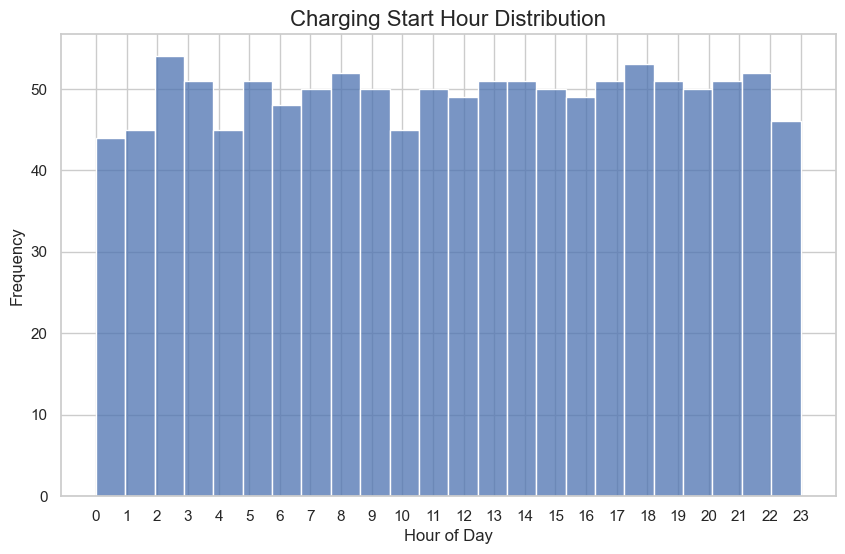

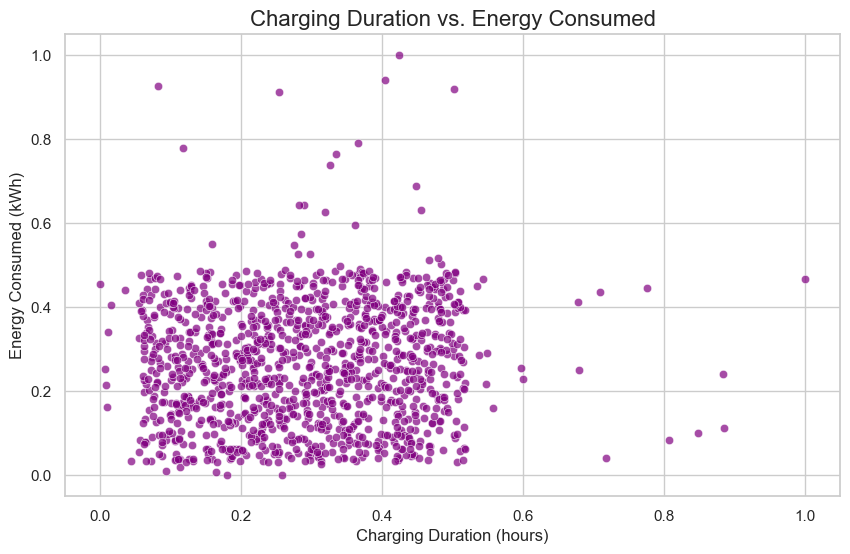

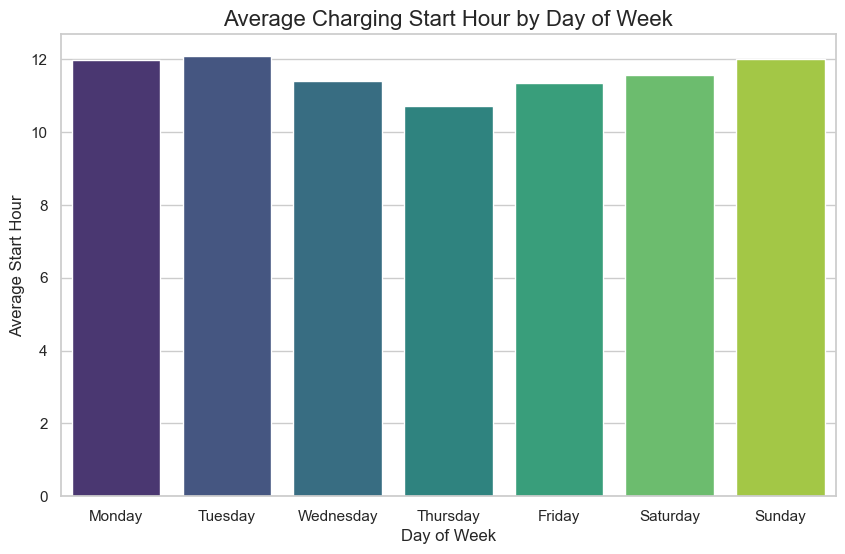

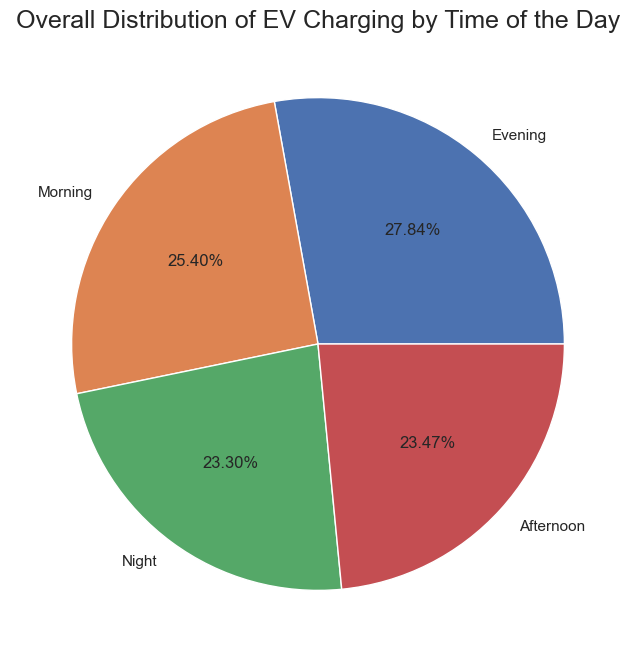

C:\Users\satvi\AppData\Local\Temp\ipykernel_42800\896072529.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=data, x='Charging Station Location', palette='Set2')
C:\Users\satvi\AppData\Local\Temp\ipykernel_42800\896072529.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], data=data, x='User Type', palette='Set3')
C:\Users\satvi\AppData\Local\Temp\ipykernel_42800\896072529.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[2], data=data, x='Charger Type', palette='Set1')


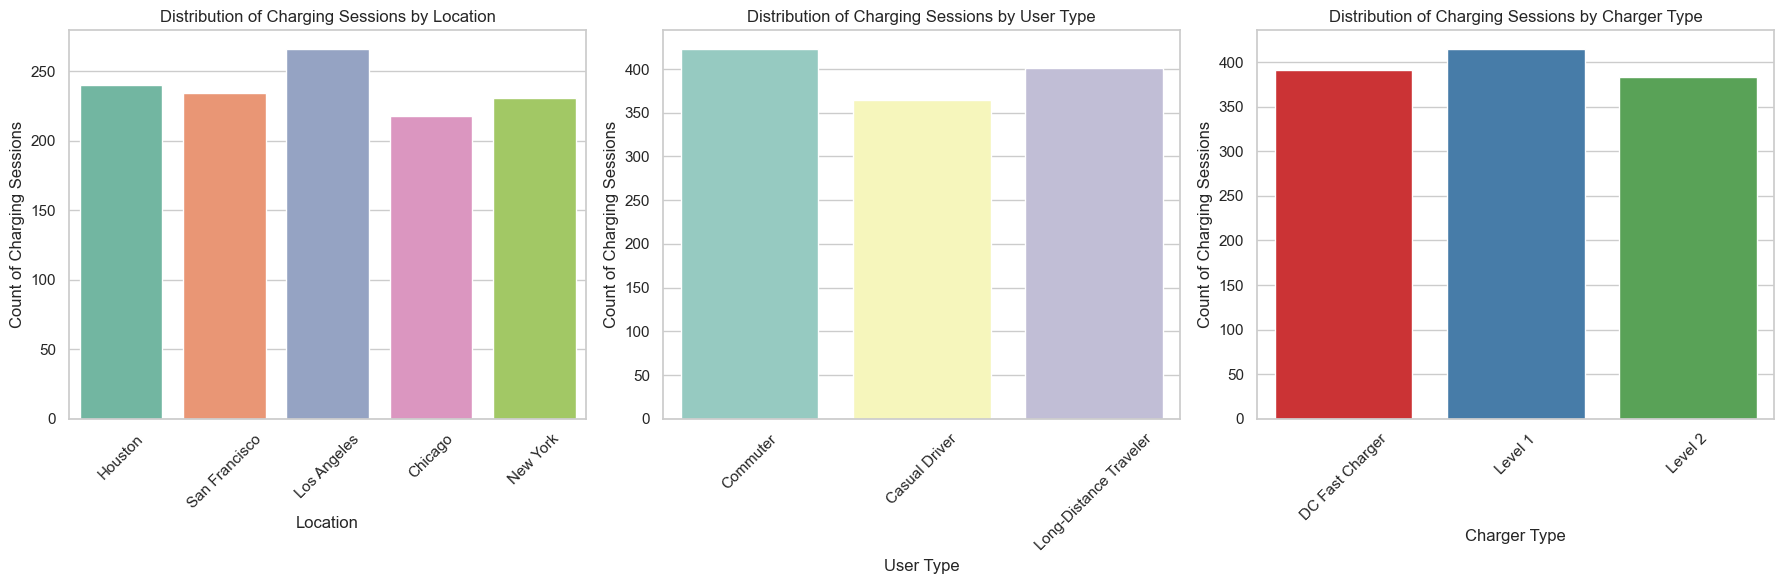

In [3]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


sns.set_theme(style="whitegrid")

#Charging start hour duration
plt.figure(figsize=(10, 6))
sns.histplot(data['Charging Start Hour'], bins=24, kde=False, palette='coolwarm')
plt.title("Charging Start Hour Distribution", fontsize=16)
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(range(0, 24))
plt.show()

# Charging Duration vs Energy Consumed
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Charging Duration (hours)', y='Energy Consumed (kWh)', data=data, alpha=0.7, color="purple")
plt.title("Charging Duration vs. Energy Consumed", fontsize=16)
plt.xlabel("Charging Duration (hours)", fontsize=12)
plt.ylabel("Energy Consumed (kWh)", fontsize=12)
plt.show()

# Average charging start hour by day of the week
plt.figure(figsize=(10, 6))
avg_start_hour = data.groupby("Day of Week")["Charging Start Hour"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
sns.barplot(x=avg_start_hour.index, y=avg_start_hour.values, palette="viridis", hue=avg_start_hour.index)
plt.title("Average Charging Start Hour by Day of Week", fontsize=16)
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Average Start Hour", fontsize=12)
plt.show()

evening_counts = data[data['Time of Day']=='Evening']['Time of Day'].value_counts().values[0]
morning_counts = data[data['Time of Day']=='Morning']['Time of Day'].value_counts().values[0]
night_counts = data[data['Time of Day']=='Night']['Time of Day'].value_counts().values[0]
afternoon_counts = data[data['Time of Day']=='Afternoon']['Time of Day'].value_counts().values[0]

index_values = [evening_counts, morning_counts, night_counts, afternoon_counts]
index_labels=['Evening', 'Morning', 'Night', 'Afternoon']

plt.figure(figsize=(10,8))
plt.pie(index_values, labels =index_labels, autopct='%2.2f%%')
plt.title('Overall Distribution of EV Charging by Time of the Day', fontsize=18)

plt.show()


sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], data=data, x='Charging Station Location', palette='Set2')
axes[0].set_title('Distribution of Charging Sessions by Location')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count of Charging Sessions')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1], data=data, x='User Type', palette='Set3')
axes[1].set_title('Distribution of Charging Sessions by User Type')
axes[1].set_xlabel('User Type')
axes[1].set_ylabel('Count of Charging Sessions')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2], data=data, x='Charger Type', palette='Set1')
axes[2].set_title('Distribution of Charging Sessions by Charger Type')
axes[2].set_xlabel('Charger Type')
axes[2].set_ylabel('Count of Charging Sessions')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

DBSCAN

In [4]:
data.tail()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),...,Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Charging Start Hour
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,0.255603,0.176546,0.046135,...,Evening,Sunday,0.300405,0.448617,0.600597,1.919655,7.0,DC Fast Charger,Commuter,19
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,0.415023,0.416839,0.176442,...,Evening,Tuesday,0.237293,0.502587,0.411353,34.029775,4.0,Level 2,Casual Driver,20
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,0.114806,0.420674,0.459056,...,Evening,Tuesday,0.566768,0.417830,0.567687,20.358761,5.0,DC Fast Charger,Commuter,21
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,0.083507,0.352689,0.382557,...,Afternoon,Sunday,0.601672,0.342862,0.731145,24.134598,5.0,Level 2,Commuter,22
1319,User_1320,Nissan Leaf,120.447195,Station_128,Los Angeles,2024-02-24 23:00:00,2024-02-24 23:56:00,0.387412,0.483520,0.336203,...,Evening,Monday,0.464415,0.288577,0.034181,-6.966593,5.0,DC Fast Charger,Commuter,23


Number of clusters: 1


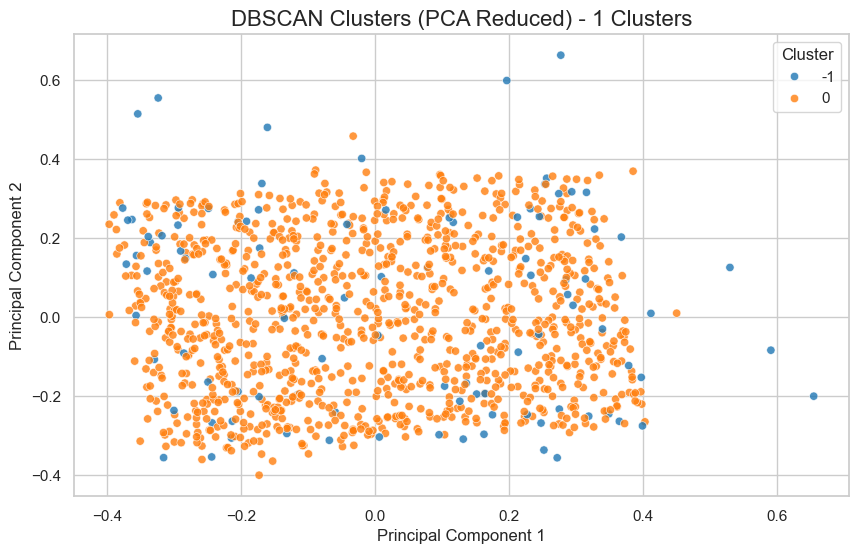

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features_for_clustering = [
    "Energy Consumed (kWh)",
    "Charging Duration (hours)",
    "Charging Rate (kW)",
    "State of Charge (Start %)",
    "State of Charge (End %)",
    "Distance Driven (since last charge) (km)"
]
clustering_data = data[features_for_clustering]

# Apply PCA for visualization (use pre-normalized data)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(clustering_data)

# Tune DBSCAN parameters
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan_clusters = dbscan.fit_predict(clustering_data)

# Add cluster labels to the original data
data['Cluster'] = dbscan_clusters

# Calculate the number of unique clusters (excluding noise)
num_clusters = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
print(f"Number of clusters: {num_clusters}")

# Visualize clusters in the reduced PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=reduced_data[:, 0], y=reduced_data[:, 1],
    hue=dbscan_clusters, palette="tab10", alpha=0.8
)
plt.title(f"DBSCAN Clusters (PCA Reduced) - {num_clusters} Clusters", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster", loc="upper right")
plt.show()


In [6]:
data.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),...,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type,Charging Start Hour,Cluster
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,0.369504,0.065790,0.364209,...,Tuesday,0.220311,0.461574,0.736448,27.947953,2.0,DC Fast Charger,Commuter,0,0
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,0.074877,0.402972,0.304634,...,Monday,0.063455,0.453017,0.279874,14.311026,3.0,Level 1,Casual Driver,1,0
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,0.116230,0.312651,0.271630,...,Thursday,0.036890,0.366324,0.178457,21.002002,2.0,Level 2,Commuter,2,0
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,0.483678,0.155324,0.327636,...,Saturday,0.658140,0.540962,0.499910,38.316313,1.0,Level 1,Long-Distance Traveler,3,0
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,0.119277,0.255238,0.091198,...,Saturday,0.423041,0.330030,0.510184,-7.834199,1.0,Level 1,Long-Distance Traveler,4,0


GMM

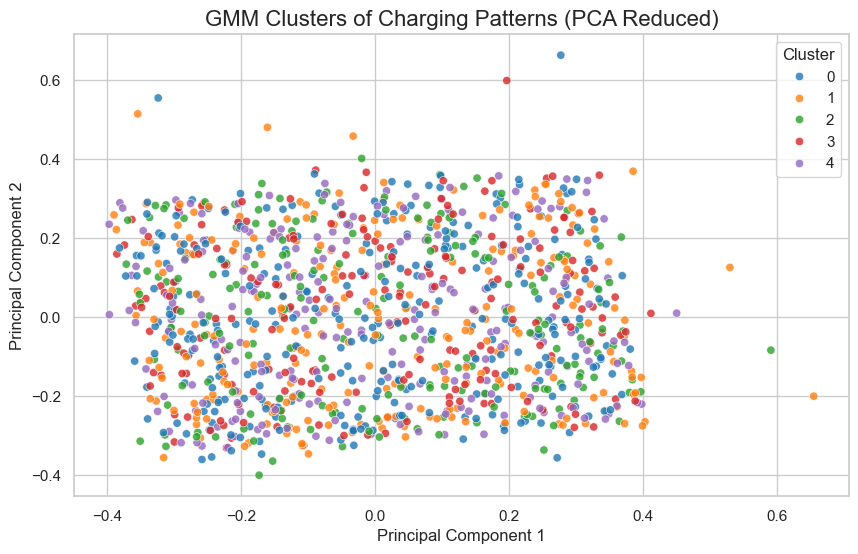

(array([[11.65374403,  0.27527457,  0.30276747],
        [17.17370429,  0.27318236,  0.27701622],
        [ 1.77173874,  0.27945572,  0.29772255],
        [21.47301302,  0.26233693,  0.2913478 ],
        [ 6.16761053,  0.2368361 ,  0.28881663]]),
 array([[[ 5.30599627e+00, -5.94088736e-02, -1.61825752e-02],
         [-5.94088736e-02,  1.87652815e-02,  8.12019135e-04],
         [-1.61825752e-02,  8.12019135e-04,  2.03843990e-02]],
 
        [[ 3.81541877e+00, -3.16801141e-02, -1.59612115e-03],
         [-3.16801141e-02,  2.31255884e-02,  3.20588232e-03],
         [-1.59612115e-03,  3.20588232e-03,  1.69540032e-02]],
 
        [[ 1.81333200e+00,  4.45973492e-02,  2.47655078e-02],
         [ 4.45973492e-02,  2.97659250e-02, -2.75846937e-03],
         [ 2.47655078e-02, -2.75846937e-03,  2.92343531e-02]],
 
        [[ 1.49144475e+00,  5.09558288e-03, -1.56974560e-02],
         [ 5.09558288e-03,  1.82950492e-02,  4.22804686e-03],
         [-1.56974560e-02,  4.22804686e-03,  1.67165687e-02]],

In [7]:
from sklearn.mixture import GaussianMixture

# Select features for clustering
features_for_clustering = ['Charging Start Hour', 'Energy Consumed (kWh)', 'Charging Duration (hours)']
clustering_data = data[features_for_clustering]

# Perform GMM clustering
gmm = GaussianMixture(n_components=5, random_state=42)  # Adjust n_components as needed
clusters = gmm.fit_predict(clustering_data)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Visualize clusters in the reduced PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette="tab10", alpha=0.8)
plt.title("GMM Clusters of Charging Patterns (PCA Reduced)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Cluster", loc="upper right")
plt.show()

# Display Gaussian centers and covariances for analysis
gmm.means_, gmm.covariances_

Metrics validation

In [8]:
from sklearn.metrics import silhouette_score

gmm_silhouette = silhouette_score(scaled_data, gmm_clusters)

if len(set(dbscan_clusters)) > 1:
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_clusters)
else:
    dbscan_silhouette = None

print("gmm :- ",gmm_silhouette)

print("\ndbscan :-",dbscan_silhouette)

NameError: name 'scaled_data' is not defined